## Pill 7: Kernels deliverable

### Blai Ras Jimenez

<div class="alert alert-danger" style = "border-radius:10px"> **DELIVERABLE: ** Implement a polynomial and linear kernel and check the result on a `moons` dataset and on `checkerboard`.</div>



In [1]:
import numpy as np
from numpy import sin
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_moons
from scipy.spatial import distance

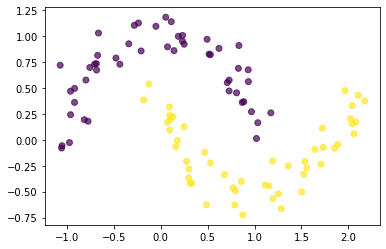

In [26]:
#The 'moons' dataset creation
X,y=make_moons(noise = 0.1)
y = 2*y-1
plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)

#### Math behind the new kernels:

$\begin{align*}
{\bf linear}: &K(x_i,x_j)=x_i^Tx_j\\
{\bf polynomial:}&K(x_i,x_j)=(x_i^Tx_j+1)^d\\
\end{align*}$

In [131]:
#Kernel implementantions needed

def lineal_kernel(xa, xb,d=None,b=None):
    return np.matmul(xa, xb.T)

def polynomial_kernel(xa, xb, d, b):
    return np.power(lineal_kernel(xa,xb) + b, d)

In [136]:
#Function that takes as an argument a set of points,
#a kernel name (with the degree and z-dimension in the case of Polynomic Kernel)
#and a limit of axis representation and performs the data classification.
def result(X,y,kernel,d,b,lim):
    
    K = kernel(X,X,d,b)
    lamb = 1.
    alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)
    
    xx,yy = np.meshgrid(np.linspace(1-lim,lim,200),np.linspace(-lim,lim,200))
    viz=np.c_[xx.ravel(),yy.ravel()]


    z = np.dot(kernel(viz,X,d,b),alpha)


    plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
    plt.gca().set_xlim([1-lim,lim])
    plt.gca().set_ylim([1-lim,lim])
    plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(1-lim,lim,1-lim,lim),alpha=0.4, vmin=0, vmax=1)

    plt.contour(xx,yy,z.reshape((200,200)))
    plt.gcf().set_size_inches((9,9))

## "Moons" dataset
### Linear Kernel

Let's test the dataset with a Linear Kernel. We can see below that the Linear kernel is not suitable in this case. Why? Because a linear kernel can't learn or fit the data points because they are "spiral-shaped", meaning that there's no line or boundary able to differenciate both class of points even if we allow missclasifications.

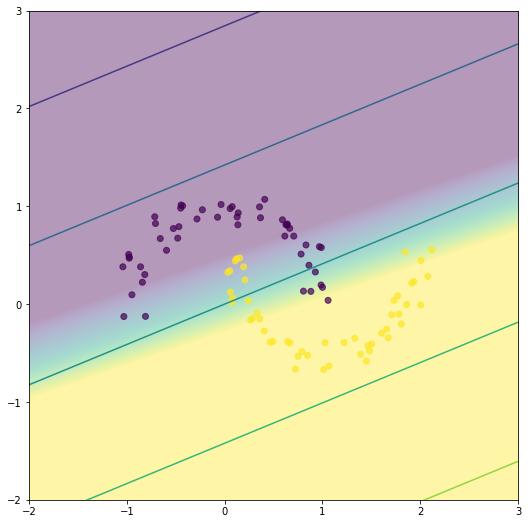

In [137]:
X,y=make_moons(noise=0.1)
y = 2*y-1
result(X,y,lineal_kernel,d=None,b=None,lim=3)

### Polynomial Kernel

Instead, the Polynomial Kernel is suitable since we are enabling curvatures (aka polynomials) to suit the data points till some degree. Let's try a second degree polynomial:

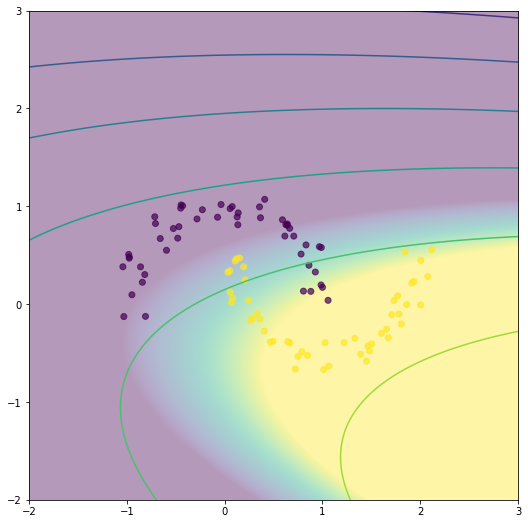

In [140]:
result(X,y,polynomial_kernel,d=2,b=1,lim=3)

We can't fit the data with a two-degree polynomial since we are in $R^2$. Let's add one more dimension:

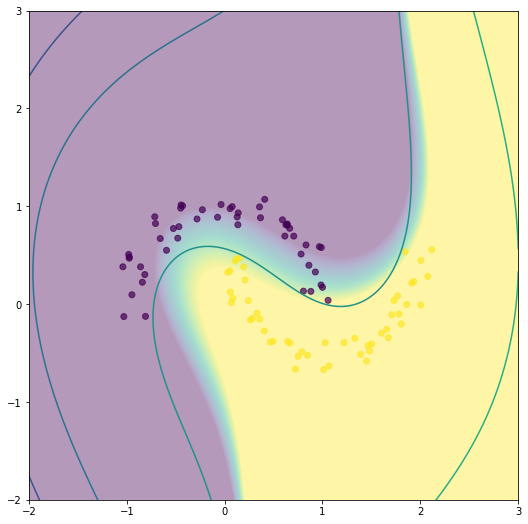

In [143]:
result(X,y,polynomial_kernel,d=3,b=1,lim=3)

Nice! We can even start playing with the z-axis ("b"):

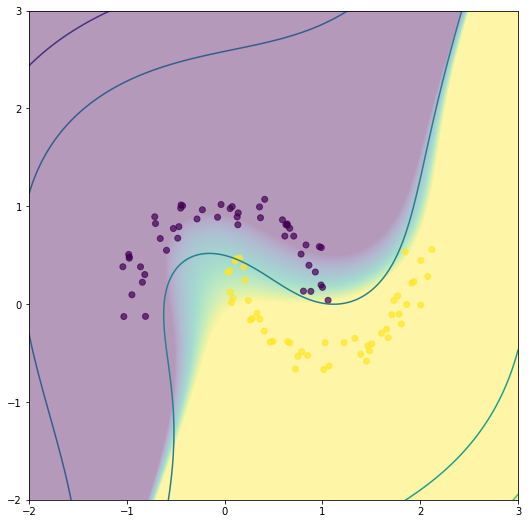

In [145]:
result(X,y,polynomial_kernel,d=3,b=0.5,lim=3)

Or adding more degrees, meaning finding a "better" and finding a more exact boundary:

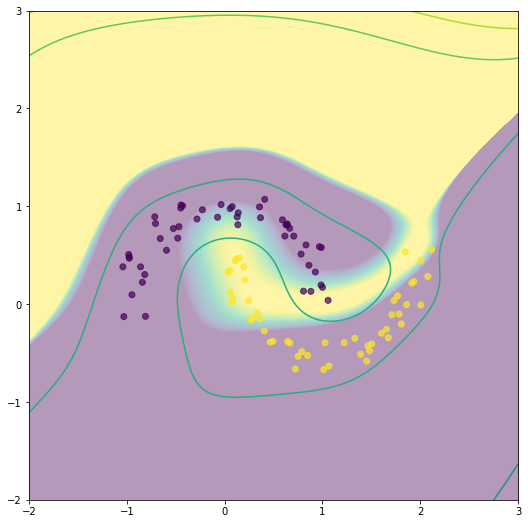

In [146]:
result(X,y,polynomial_kernel,d=7,b=1,lim=3)

## Checkboard dataset

I've designed a function that is able to creat a better checkboard-like dataset rather than the one from Sklearn. In fact, I do not understand enough the function "make_checkboard" to adapt it to this problem. Therefore...:

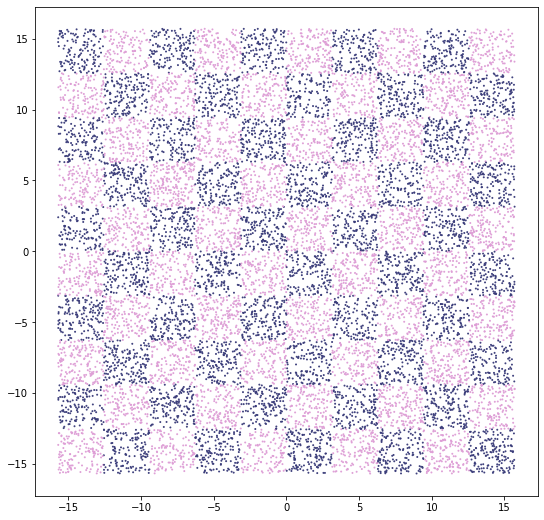

In [153]:
def make_checkerboard(n_points,clusters):
    n_classes = 2
    x = np.random.uniform(-(clusters//2)*np.pi, (clusters//2)*np.pi, size=(n_points, n_classes))
    mask = np.logical_or(np.logical_and(sin(x[:,0]) > 0.0, sin(x[:,1]) > 0.0), \
    np.logical_and(sin(x[:,0]) < 0.0, sin(x[:,1]) < 0.0))
    y = np.eye(n_classes)[1*mask]
    y = 2*y[:,0]-1
    plt.scatter(x[:,0], x[:,1], c=y, s=1, cmap="tab20b_r", alpha=0.9)
    plt.gcf().set_size_inches((9,9))
    plt.show()
    return x,y
_,_ = make_checkerboard(15000,10)

### Linear Kernel

The Linear Kernel is again useless in this case since minimum we will have 4 squares (if not, it's not a checkboard) and therefore the boundary needs again to "curve" in order to fit the data. Let's prove it:

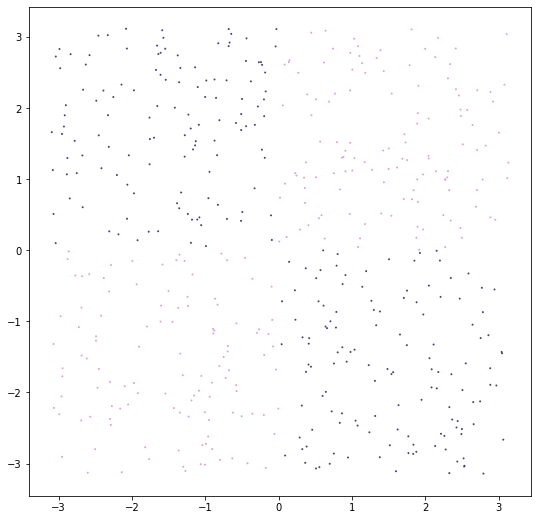

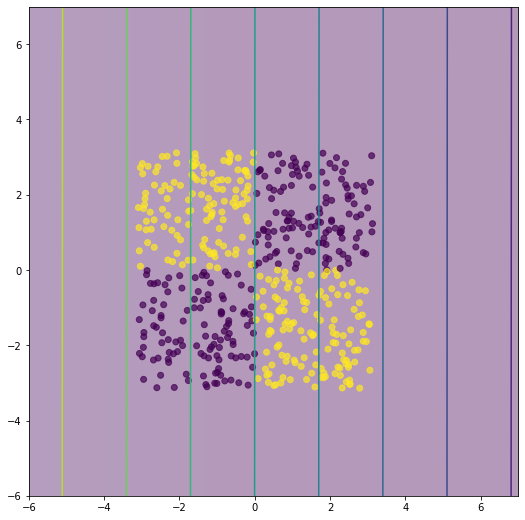

In [159]:
X,y = make_checkerboard(500,2)
result(X,y,lineal_kernel,None,None,7)

With a single straight line we could not differentiate anything. Let's try, then, the polynomial.

### Polynomial Kernel

Let's start with a 2x2 grid and therefore a 4-degree polynomial:

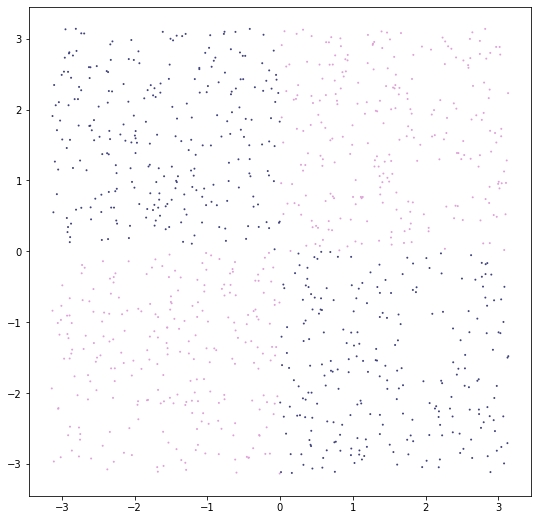

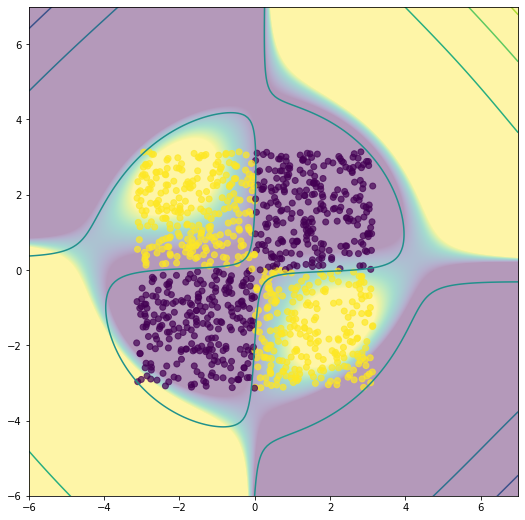

In [158]:
X,y = make_checkerboard(1000,2)
result(X,y,polynomial_kernel,4,1,7)

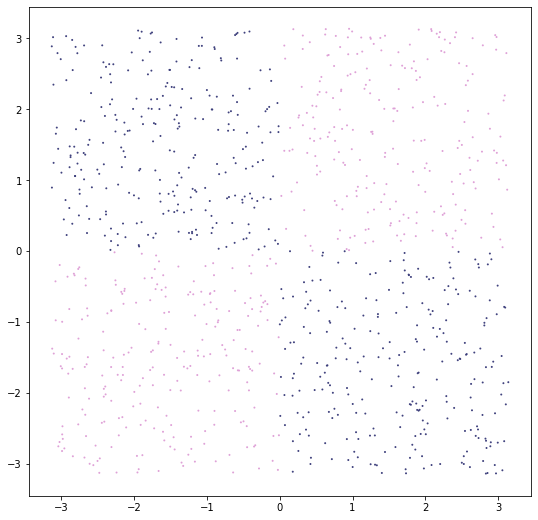

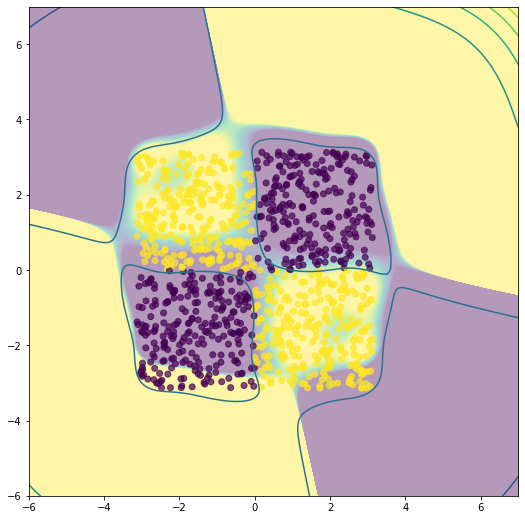

In [162]:
X,y = make_checkerboard(1000,2)
result(X,y,polynomial_kernel,8,1,7)

Quite a good result, right? But, if we increase the grid size, things get messy...:

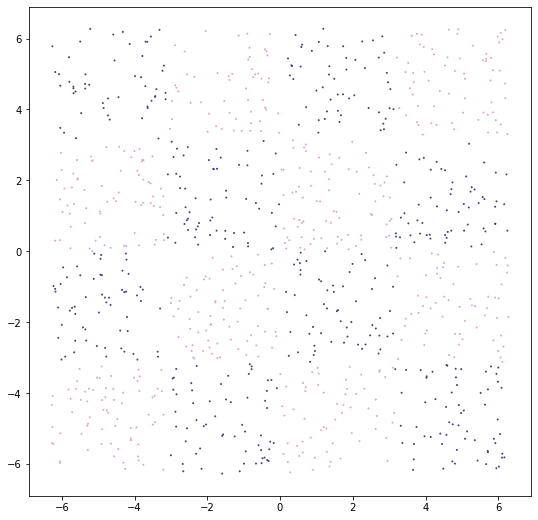

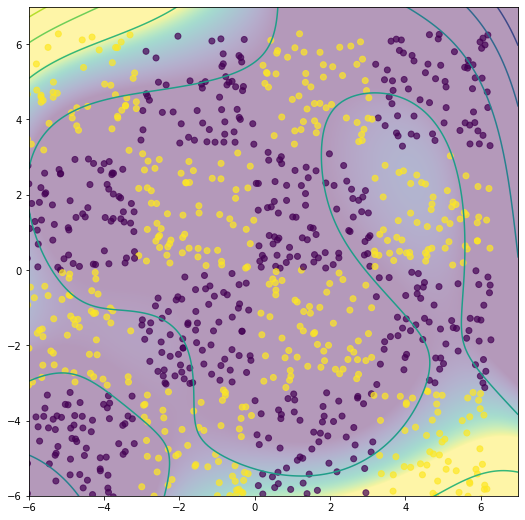

In [160]:
X,y = make_checkerboard(1000,4)
result(X,y,polynomial_kernel,5,1,7)

And if we increase even more the degree...:

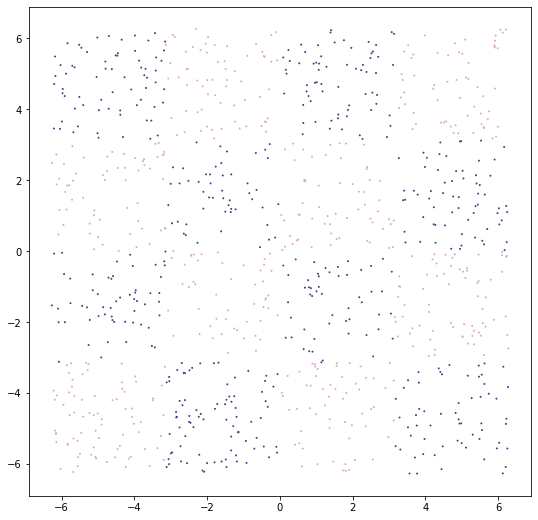

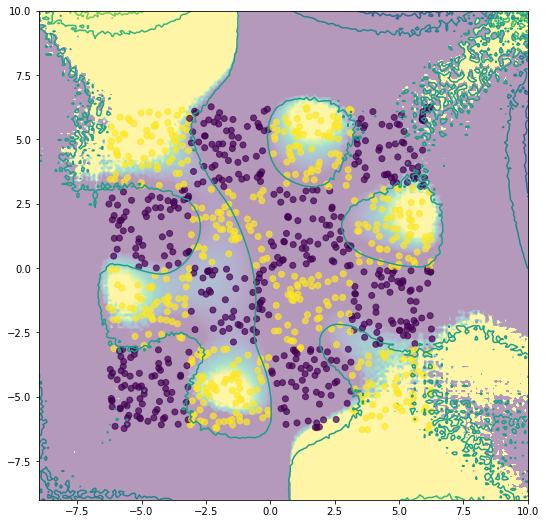

In [170]:
X,y = make_checkerboard(1000,4)
result(X,y,polynomial_kernel,8,1,10)

We can start seeing the loose of "smoothness" and that we are not able to correctly differentiate the two kinds of points in the middle of the grid. 

Creating more or less points or increasing even more the degree of the polynomial will not do any better. What we can try is a gaussian kernel.

In [175]:
def gaussian_kernel(xa,xb,gamma):
    d = distance.cdist(xa,xb,metric='euclidean')
    return np.exp(-d*gamma)


def gaussian(X,y,gamma,lim):

    K = gaussian_kernel(X,X,gamma)
    lamb = 1.
    alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)
    
    
    xx,yy = np.meshgrid(np.linspace(1-lim,lim,200),np.linspace(1-lim,lim,200))
    viz=np.c_[xx.ravel(),yy.ravel()]
    z = np.dot(gaussian_kernel(viz,X,1.),alpha)

    plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
    plt.gca().set_xlim([1-lim,lim])
    plt.gca().set_ylim([1-lim,lim])
    plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(1-lim,lim,1-lim,lim),alpha=0.4, vmin=0, vmax=1)

    plt.contour(xx,yy,z.reshape((200,200)))
    plt.gcf().set_size_inches((9,9))

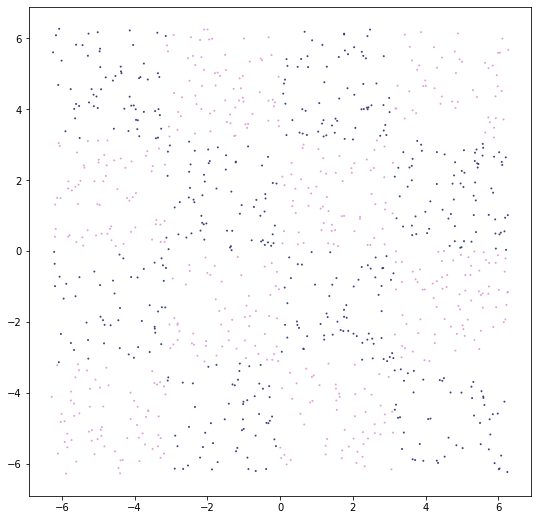

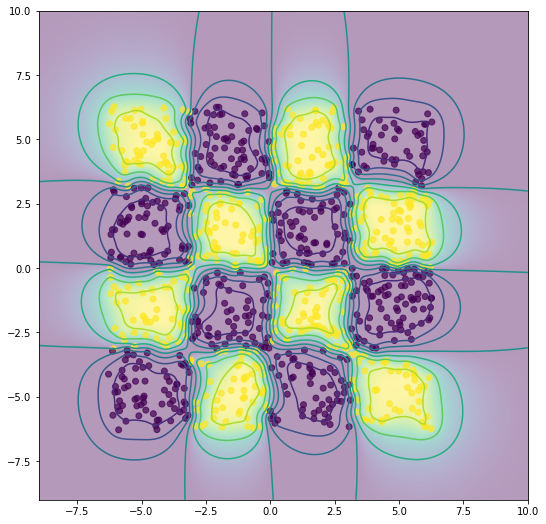

In [178]:
X,y = make_checkerboard(1000,4)
gaussian(X,y,0.3,10)

Perfect!

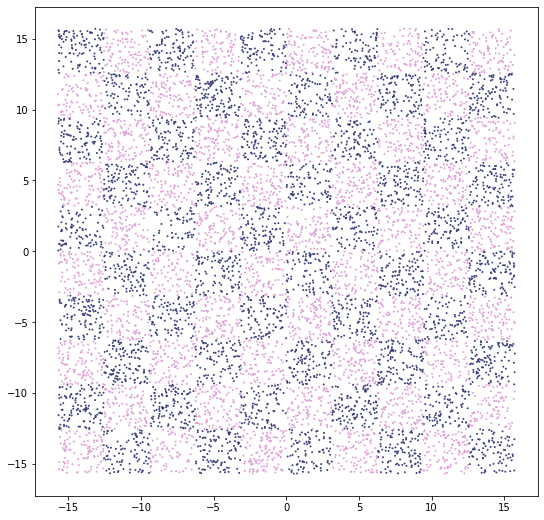

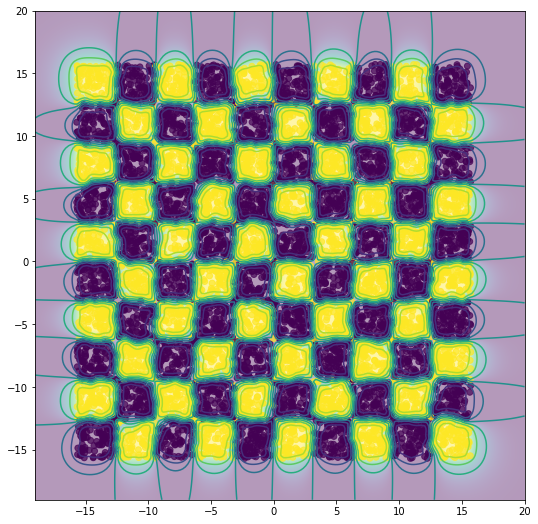

In [182]:
X,y = make_checkerboard(10000,10)
gaussian(X,y,0.3,20)

Jejejejej